## VIX指数およびSKEW指数を取得して可視化し、SP500との関係を確認
###  https://note.com/scilabcafe/n/n4453900c63e2

In [1]:
import pandas_datareader.data as web
import yfinance as yf
import datetime
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import japanize_matplotlib
%matplotlib inline

In [2]:
# 確認対象銘柄

# stooqより取得
codelists_stooq  =  [
    "^SPX", # S&P 500
]

# yahoofinanceより取得
codelists_yf  =  [
    "^VIX", # VIX index
    "^SKEW", # SKEW index
]

In [3]:
# 2018/1/1から現在まで
start  =  '2018-01-01'
end  =  datetime.date.today()

# データ取得(stooq)
_df_stooq  =  web.DataReader(codelists_stooq, 'stooq', start, end)['Close']

# 日付を昇順に並び替える
_df_stooq.sort_index(inplace = True)

# データ取得(yahoo finance)
_df_yahoo  =  yf.download(codelists_yf, start, end)['Adj Close']

df  =  pd.DataFrame()
df  =  pd.merge(_df_stooq, _df_yahoo, on = 'Date', how = 'outer')

df.columns  =  ['S&P500', 'SKEW', 'VIX']

[*********************100%%**********************]  2 of 2 completed


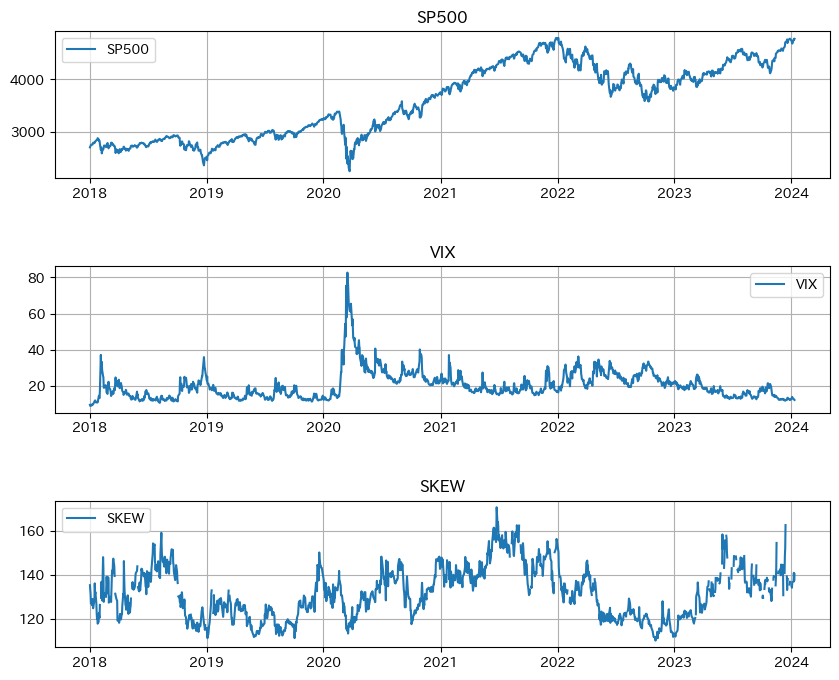

In [4]:
plt.figure(figsize = (10,8))
 
# 余白を設定
plt.subplots_adjust(wspace = 0.4, hspace = 0.6)

# グラフの描画
plt.subplot(3,1,1)
plt.plot(df['S&P500'], label = 'SP500')
plt.title('SP500')
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(df['VIX'], label = 'VIX')
plt.title('VIX')
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(df['SKEW'], label = 'SKEW')
plt.title('SKEW')
plt.legend()
plt.grid(True)

plt.show()

In [5]:
import plotly.graph_objects as go  # グラフ表示関連ライブラリ
import plotly.io as pio  # 入出力関連ライブラリ
pio.renderers.default  =  'iframe'

# subplot
from plotly.subplots import make_subplots


# グラフの実体trace オブジェクトを生成
sp500_trace  =  go.Scatter(
    x = df.index,
    y = df['S&P500'],
    mode = 'lines',
    line = dict(color = 'blue', width = 5),
    name = 'S&P500'
)


# グラフの実体trace オブジェクトを生成
skew_trace  =  go.Scatter(
    x = df.index,
    y = df['SKEW'],
    mode = 'lines',
    line = dict(color = 'red', width = 5),
    name = 'SKEW'
)

# グラフの実体となる trace オブジェクトを生成
vix_trace  =  go.Scatter(
    x = df.index,
    y = df['VIX'],
    mode = 'lines',
    line = dict(color = 'red', width = 5),
    name = 'VIX'
)

# 2つ目の軸を表示する設定
fig  =  make_subplots(specs = [[{"secondary_y": True}]])


# 描画領域である figure オブジェクトの作成                  
fig.add_trace(sp500_trace, secondary_y = False)  # 第1軸に設定(secondary_y = False)
fig.add_trace(vix_trace, secondary_y = True)  # 第2軸に設定(secondary_y = True)


# レイアウトの更新
fig.update_layout(
    
    # 凡例
    showlegend = True,
    
    # 幅と高さの設定
    width = 900,height = 600,
    
    # タイトルの設定
    title = dict(
        text = 'SP500とVIXの関係', # タイトル
        font = dict(family = 'Times New Roman', size = 20, color = 'grey'), # フォントの指定
        xref = 'paper', # container or paper
        x = 0.45,
        y = 0.9,
        xanchor = 'center',
    ),
    
    plot_bgcolor = 'white', # 背景色を白に設定

    # 凡例の設定
    legend = dict(
        xanchor = 'right',
        yanchor = 'bottom',
        x = 0.5,
        y = 0.85,
        orientation = 'v',
        bgcolor = 'white',
        bordercolor = 'grey',
        borderwidth = 1,
    ),
    
),

# 軸の設定
fig.update_yaxes(title = 'SP500', secondary_y = False)
fig.update_yaxes(title = 'VIX index', secondary_y = True)


# linecolorを設定して、ラインをミラーリング（mirror = True）して枠にする
fig.update_xaxes(linecolor = 'black', linewidth = 1, mirror = True)
fig.update_yaxes(linecolor = 'black', linewidth = 1, mirror = True)

fig.update_xaxes(linecolor = 'black', linewidth = 1, mirror = True)
fig.update_yaxes(linecolor = 'black', linewidth = 1, mirror = True)


# ticks = 'inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)
fig.update_yaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)

fig.update_xaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)
fig.update_yaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)


# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash = 'dot'：破線
fig.update_xaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')
fig.update_yaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')

fig.update_xaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')
fig.update_yaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')


# tick0：初期軸目盛り, dtick：軸目盛り間隔
fig.update_xaxes(dtick = 'M12')  # 12カ月ごと

# 軸の文字サイズ変更
fig.update_xaxes(tickfont = dict(size = 14, color = 'grey'))
fig.update_yaxes(tickfont = dict(size = 18, color = 'grey'))

# show()メソッドでグラフを描画
fig.show()

In [6]:
# 2つ目の軸を表示する設定
fig  =  make_subplots(specs = [[{"secondary_y": True}]])


# 描画領域である figure オブジェクトの作成                  
fig.add_trace(sp500_trace, secondary_y = False)  # 第1軸に設定(secondary_y = False)
fig.add_trace(skew_trace, secondary_y = True)  # 第2軸に設定(secondary_y = True)


# レイアウトの更新
fig.update_layout(
    
    # 凡例
    showlegend = True,
    
    # 幅と高さの設定
    width = 900,height = 600,
    
    # タイトルの設定
    title = dict(
        text = 'SP500とSKEWの関係', # タイトル
        font = dict(family = 'Times New Roman', size = 20, color = 'grey'), # フォントの指定
        xref = 'paper', # container or paper
        x = 0.45,
        y = 0.9,
        xanchor = 'center',
    ),
    
    plot_bgcolor = 'white', # 背景色を白に設定

    # 凡例の設定
    legend = dict(
        xanchor = 'right',
        yanchor = 'bottom',
        x = 0.5,
        y = 0.85,
        orientation = 'v',
        bgcolor = 'white',
        bordercolor = 'grey',
        borderwidth = 1,
    ),
    
),


# 軸の設定
fig.update_yaxes(title = 'SP500', secondary_y = False)
fig.update_yaxes(title = 'SKEW index', secondary_y = True)


# linecolorを設定して、ラインをミラーリング（mirror = True）して枠にする
fig.update_xaxes(linecolor = 'black', linewidth = 1, mirror = True)
fig.update_yaxes(linecolor = 'black', linewidth = 1, mirror = True)

fig.update_xaxes(linecolor = 'black', linewidth = 1, mirror = True)
fig.update_yaxes(linecolor = 'black', linewidth = 1, mirror = True)


# ticks = 'inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)
fig.update_yaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)

fig.update_xaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)
fig.update_yaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)


# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash = 'dot'：破線
fig.update_xaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')
fig.update_yaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')

fig.update_xaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')
fig.update_yaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')


# tick0：初期軸目盛り, dtick：軸目盛り間隔
fig.update_xaxes(dtick = 'M12')  # 12カ月ごと

# 軸の文字サイズ変更
fig.update_xaxes(tickfont = dict(size = 14, color = 'grey'))
fig.update_yaxes(tickfont = dict(size = 18, color = 'grey'))

# show()メソッドでグラフを描画
fig.show()

In [7]:
# グラフィック系ライブラリ
import plotly.graph_objects as go  # グラフ表示関連ライブラリ
import plotly.io as pio  # 入出力関連ライブラリ
pio.renderers.default  =  'iframe'


# グラフの実体となる trace オブジェクトを生成
hist_trace  =  go.Histogram(
    x = df['VIX'],
    histnorm = 'probability',
    nbinsx = 40)


# レイアウトオブジェクトを生成
graph_layout  =  go.Layout(
    
    # 幅と高さの設定
    width = 800, height = 500,
    
    # タイトルの設定
    title = dict(
        text = 'VIX distribution', # タイトル
        font = dict(family = 'Times New Roman', size = 20, color = 'grey'), # フォントの指定
        xref = 'paper', # container or paper
        x = 0.5,
        y = 0.87,
        xanchor = 'center',
    ),
    
    # y軸の設定
    yaxis = dict(
        # y軸のタイトルの設定
        title = dict(text = 'probability', font = dict(family = 'Times New Roman', size = 20, color = 'grey')),
    ),
    
)


# 描画領域である figure オブジェクトの作成                    
fig  =  go.Figure(layout = graph_layout)


# add_trace()メソッドでグラフの実体を追加
fig.add_trace(hist_trace)


# レイアウトの更新
fig.update_layout(
    plot_bgcolor = 'white', # 背景色を白に設定
)



# 軸の設定
# linecolorを設定して、ラインをミラーリング（mirror = True）して枠にする
fig.update_xaxes(linecolor = 'black', linewidth = 1, mirror = True)
fig.update_yaxes(linecolor = 'black', linewidth = 1, mirror = True)


# ticks = 'inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)
fig.update_yaxes(ticks = 'inside', tickcolor = 'black', tickwidth = 1, ticklen = 5)


# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash = 'dot'：破線
fig.update_xaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')
fig.update_yaxes(gridcolor = 'lightgrey', gridwidth = 1, griddash = 'dot')


# 軸の文字サイズ変更
fig.update_xaxes(tickfont = dict(size = 15, color = 'grey'))
fig.update_yaxes(tickfont = dict(size = 15, color = 'grey'))


# show()メソッドでグラフを描画
fig.show()

In [8]:
# データの前処理
latest_value  =  df['VIX'][-1]  # 最新のVIX指数の値

# ゲージチャートの描画
fig  =  go.Figure(go.Indicator(
    mode = "gauge+number",
    value = latest_value,
    domain = {'x': [0, 1], 'y': [0, 1]},
    gauge = {'axis': {'range': [0, 100]},
           'steps': [{'range': [0, 20], 'color': 'green'},
                     {'range': [20, 30], 'color': 'yellow'},
                     {'range': [30, 60], 'color': 'orange'},
                     {'range': [60, 100], 'color': 'red'}],
           'threshold': {'line': {'color': 'black', 'width': 4}, 'thickness': 0.75, 'value': latest_value}}))

fig.update_layout(title = 'VIX Volatility Index', title_x = 0.5)


# ゲージチャートを表示
fig.show()

/tmp/ipykernel_11626/380150133.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [9]:
df.corr() # 相関関係

,S&P500,SKEW,VIX
S&P500,1.000000,0.430441,-0.080657
SKEW,0.430441,1.000000,-0.260030
VIX,-0.080657,-0.260030,1.000000


<Axes: >

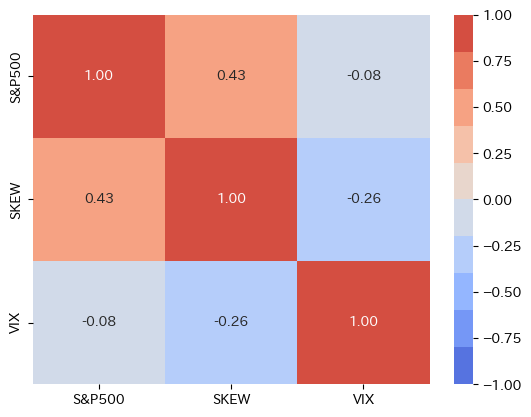

In [10]:
import seaborn as sns
cor  =  df.corr()
sns.heatmap(cor, cmap =  sns.color_palette('coolwarm', 10), annot = True,fmt = '.2f', vmin  =  -1, vmax  =  1)